In [1]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

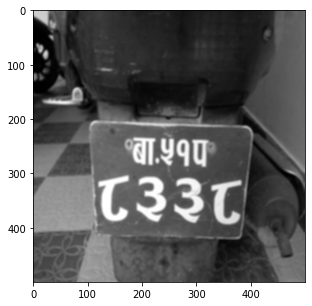

In [2]:
test_img = cv2.imread('test_images/test2.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (500,500),interpolation =cv2.INTER_CUBIC)
gray = cv2.cvtColor(test_img , cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5),cv2.BORDER_DEFAULT)
plt.figure(figsize=(5,5))
plt.imshow(blurred, cmap='gray')

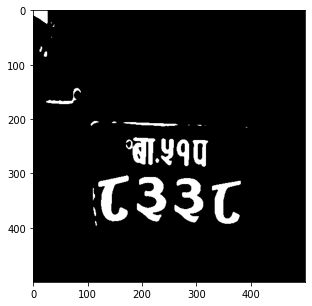

In [3]:
_, thresh = cv2.threshold(blurred, 170, 255, 0)
plt.figure(figsize=(5,5))
plt.imshow(thresh, cmap='gray')

In [4]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:8]

In [5]:
img_cord = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    #cv2.rectangle(test_img, (x, y), (x+w, y+h), (0,255,0), 2)
    img_cord.append([x,y, w, h])
#plt.figure(figsize=(8,8))
#plt.imshow(test_img)
#plt.show()

In [6]:
for i in range(len(img_cord)):
    for j in range(i+1,len(img_cord)):
        if img_cord[i][1] > img_cord[j][1]:
            img_cord[i], img_cord[j] = img_cord[j], img_cord[i]  
top_cord = img_cord[:4]
buttom_cord = img_cord[4:]
for i in range(len(top_cord)):
    for j in range(i+1,len(top_cord)):
        if top_cord[i][0] > top_cord[j][0]:
            top_cord[i], top_cord[j] = top_cord[j], top_cord[i] 
        if buttom_cord[i][0] > buttom_cord[j][0]:
            buttom_cord[i], buttom_cord[j] = buttom_cord[j], buttom_cord[i] 
img_cord = top_cord + buttom_cord
images = []
for cord in img_cord:
    x, y, w, h = cord
    temp = test_img[y:y+h, x:x+w]
    images.append(temp)

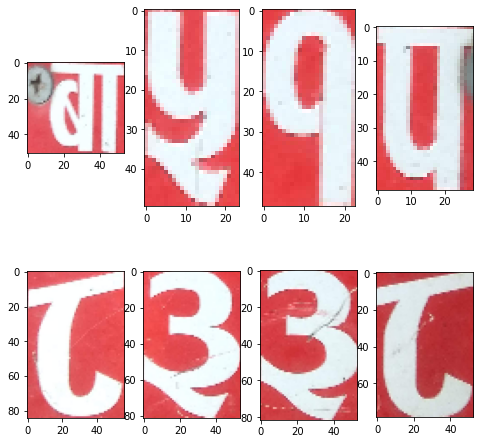

In [7]:
row, col = 2,4
figure = plt.figure(figsize=(8,8))
for i in range(1, row*col+1):
    figure.add_subplot(row, col, i)
    plt.imshow(images[i-1])